# 1. Dataset with 1 variable

In [3]:
url='https://www.cdslab.org/recipes/programming/regression-linear-gaussian/z.csv'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
#downloads file from given url
def download(url, fpath):
    import requests
    r = requests.get(url)
    with open(fpath, 'wb') as f:
        f.write(r.content)
    return None

#fetching data file
def fetchDatafromWeb(filePath,url):
    download(url,filePath)
    return filePath

In [6]:
fetchDatafromWeb(filePath="./z.csv", url=url)

'./z.csv'

In [7]:
df=pd.read_csv("./z.csv", header=None)
df.columns=["variable"]
df

,variable
0,1.76900
1,1.51060
2,0.16401
3,-0.28276
4,1.15220
...,...
995,-0.55780
996,-0.10656
997,-0.21516
998,0.47349


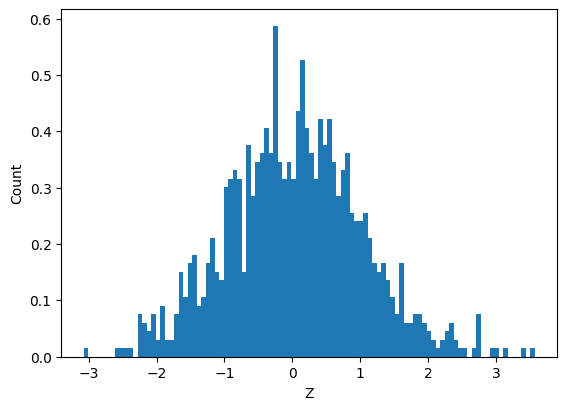

In [8]:
fig = plt.figure(figsize =(6.4,4.6), dpi =100)
ax =plt.subplot()
ax.hist (df.variable.values
         , bins =100
         , linewidth =0
         , histtype ='stepfilled'
         , density = True)
plt.ylabel('Count')
plt.xlabel('Z');
plt.show()

In [9]:
#ldata = np.log(df["variable"])
data=df.variable.values

In [10]:
def getLogLike(param):
    """ Return the log likehood of the gaussian- dist data 
        given the vector parameters "params"=[avg, std] """
    avg = param[0]
    std = np.exp(param[1])
    ndata = len(data)
    
    lprob = - param[1]*ndata \
            - 18378.770664093452 \
            - np.sum((data -avg)**2) / (2* std**2)
    return lprob

In [11]:
def negLogLike(param): return -getLogLike(param)

In [12]:
from scipy.optimize import fmin
bestParams = fmin (func = negLogLike, x0= [-3,1])
print('Returns[{}= {},{}= {}]'.format(chr(956),bestParams[0],chr(963),bestParams[1]))

Optimization terminated successfully.
         Current function value: 18876.958802
         Iterations: 45
         Function evaluations: 85
Returns[μ= 0.03922099279500735,σ= -0.0018085313705571188]


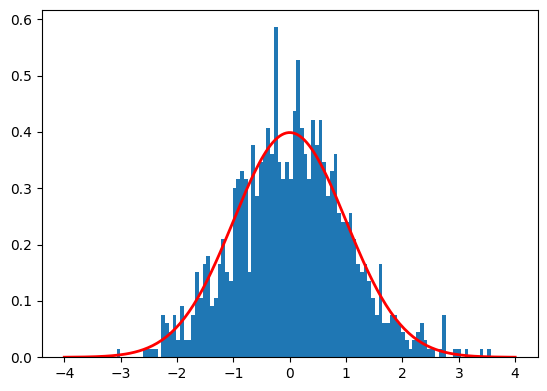

In [13]:
from scipy.stats import norm
testx= np.linspace(-4,4,200)
testy= norm.pdf(testx)

fig = plt.figure(figsize =(6.4,4.6), dpi =100)
ax =plt.subplot()

h = ax.hist (data
         , bins =100
         , linewidth =0
         , histtype ='stepfilled'
         , density = True)

h = ax.plot ( testx
            , testy
            , color = 'r'
            , linewidth = 2
            )

In [14]:
#checking with norm.logpdf
def gaussian(params):
    mean = params[0]   
    std = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(norm.logpdf(data, loc=mean, scale=std))

    return nll
fmin (func = gaussian, x0= [-3,1])

Optimization terminated successfully.
         Current function value: 1417.126670
         Iterations: 47
         Function evaluations: 89


array([0.03929988, 0.99819119])

# 2. Dataset with 2 variables

In [15]:
url2='https://www.cdslab.org/recipes/programming/regression-linear-gaussian/xy.csv'

In [16]:
fetchDatafromWeb(filePath="./xy.csv", url=url2)

'./xy.csv'

In [17]:
df=pd.read_csv("./xy.csv")
df

,x,y
0,4.85380,9.6227
1,8.00280,12.5130
2,1.41890,4.5829
3,4.21760,6.9348
4,9.15740,13.3100
...,...,...
995,0.25135,2.6935
996,4.21110,7.1046
997,1.84100,4.6258
998,7.25780,10.7310


In [18]:
x=df["x"]
y=df["y"]

In [ ]:
#ldata = np.log(df["variable"])

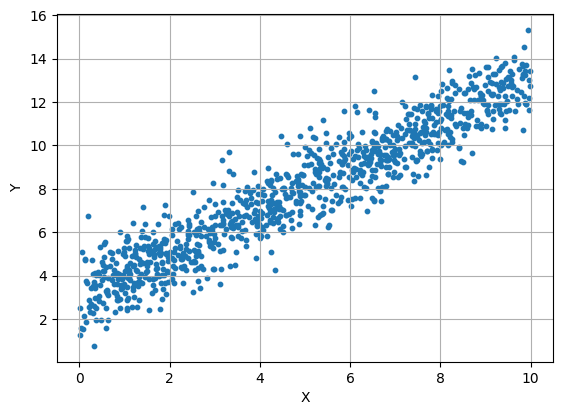

In [19]:
fig = plt.figure(figsize =(6.4,4.6), dpi =100)
ax =plt.subplot()
ax.scatter (x, y,s=10)
plt.ylabel('Y')
plt.xlabel('X')
plt.grid()
plt.show()

In [20]:
def getLogLike(param):
    """ Return the log likehood of the gaussian- dist data 
        given the vector parameters "params"=[std,a,b] """
    #b -"m"
    #a -"y-intercept"
   
    avg  = (param[2]*x) + param[1]
    std = np.exp(param[0])
    ndata = len(data)
    

    lprob = - param[0]*ndata \
            - 18378.770664093452 \
            - np.sum((y -avg)**2) / (2* std**2)

    
    return lprob

In [21]:
getLogLike([1,1,3])

-25582.377966840868

In [22]:
def negLogLike(param): return -getLogLike(param)

In [23]:
from scipy.optimize import fmin
bestParams = fmin (func = negLogLike, x0= [1,0,0])
bestParams
print('Returns[{}= {},a= {},b= {} ]'.format(chr(963),bestParams[0],bestParams[1],bestParams[2]))

Optimization terminated successfully.
         Current function value: 18876.941021
         Iterations: 225
         Function evaluations: 412
Returns[σ= -0.0018463821435524027,a= 3.027269111684035,b= 1.0024664996803803 ]


In [24]:
#checking with norm.pdf
def gaussian(params):
    mean = (params[2]*x) + params[1]
    std = params[0]

    # Calculate negative log likelihood
    nll = -np.sum(norm.logpdf(y, loc=mean, scale=std))

    return nll
fmin (func = gaussian, x0= [1,1,0])

Optimization terminated successfully.
         Current function value: 1417.108890
         Iterations: 183
         Function evaluations: 326


array([0.99818869, 3.02727433, 1.00246944])

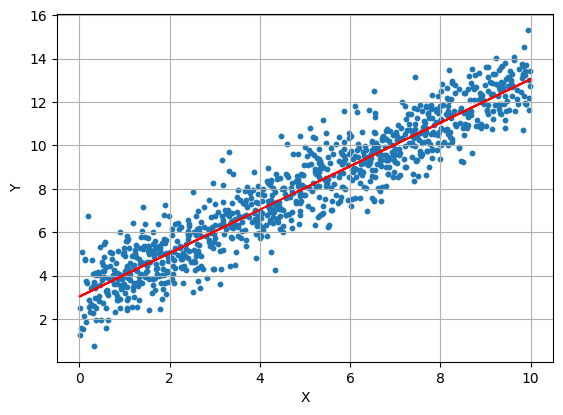

In [25]:
fig = plt.figure(figsize =(6.4,4.6), dpi =100)
ax =plt.subplot()
ax.scatter (x, y,s=10)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='r')

plt.ylabel('Y')
plt.xlabel('X')
plt.grid()
plt.show()


In [26]:
m,b
#b~a

(1.0024713258159264, 3.0272601840614173)